In [267]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing
import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

SyntaxError: invalid syntax (4203267773.py, line 8)

In [9]:
train_df = pd.read_csv('C:/Users/Katlego/Downloads/Titanic_/train.csv')
test_df = pd.read_csv('C:/Users/Katlego/Downloads/Titanic_/test.csv')

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [43]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [67]:
train_df.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [71]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [73]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [75]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [77]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [83]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_Size_Group'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Group'] = train_df['Family_Size'].map(family_map)

In [85]:
train_df.groupby(['Family_Size_Group'], as_index=False)['Survived'].mean()

,Family_Size_Group,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [87]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


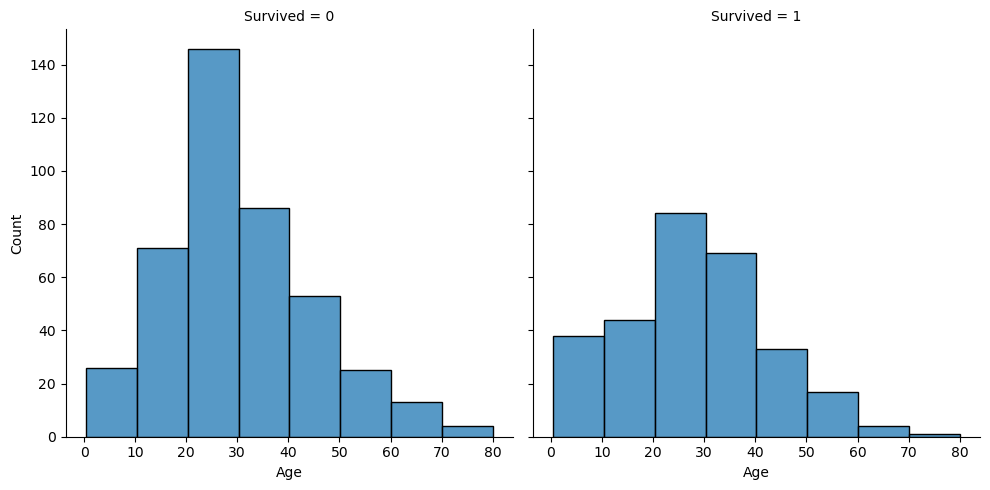

In [89]:
sns.displot(train_df, x = 'Age', col = 'Survived', binwidth = 10, height = 5)

In [93]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)

In [95]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

C:\Users\Katlego\AppData\Local\Temp\ipykernel_23148\1587675067.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [101]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age']

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

In [103]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


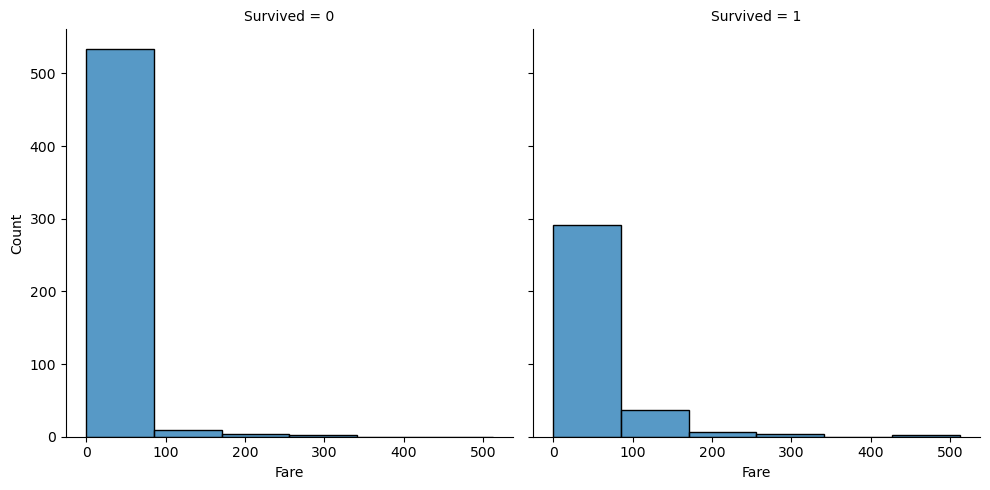

In [105]:
sns.displot(train_df, x = 'Fare', col = 'Survived', binwidth = 80, height = 5)

In [111]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)

In [113]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\Katlego\AppData\Local\Temp\ipykernel_23148\1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [119]:
train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 26) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
train_df.loc[train_df['Fare'] > 512.329, 'Fare']

test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 26) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
test_df.loc[test_df['Fare'] > 512.329, 'Fare']

343    512.3292
Name: Fare, dtype: float64

In [123]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [135]:
train_df['Title'] = train_df['Name'].str.split(pat = ",", expand = True)[1].str.split(pat =".", expand = True)[0]. apply(lambda x:x.strip())
test_df['Title'] = test_df['Name'].str.split(pat = ",", expand = True)[1].str.split(pat =".", expand = True)[0]. apply(lambda x:x.strip())

In [137]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [139]:
train_df['Title'] = train_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Jonkheer' : 'Noble',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble'
})

test_df['Title'] = test_df['Title'].replace({
    'Capt' : 'Military',
    'Col' : 'Military',
    'Major' : 'Military',
    'Jonkheer' : 'Noble',
    'the Countess' : 'Noble',
    'Don' : 'Noble',
    'Lady' : 'Noble',
    'Sir' : 'Noble',
    'Mlle' : 'Noble',
    'Ms' : 'Noble',
    'Mme' : 'Noble'
})

In [143]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [145]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

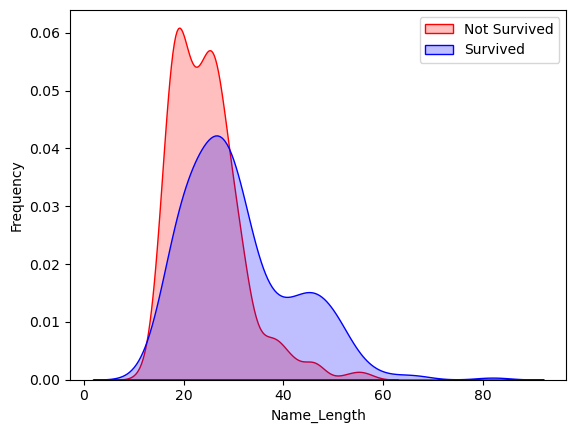

In [157]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived'] == 0) & (train_df['Name_Length'].notnull())], color = 'Red', fill = True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived'] == 1) & (train_df['Name_Length'].notnull())], ax = g, color = 'Blue', fill = True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [161]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 8)

In [165]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

C:\Users\Katlego\AppData\Local\Temp\ipykernel_23148\554738133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [167]:
train_df.loc[train_df['Name_Length'] <= 18, 'Name_Length'] = 0
train_df.loc[(train_df['Name_Length'] > 18) & (train_df['Name_Length'] <= 20), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 20) & (train_df['Name_Length'] <= 23), 'Name_Size'] = 2
train_df.loc[(train_df['Name_Length'] > 23) & (train_df['Name_Length'] <= 25), 'Name_Size'] = 3
train_df.loc[(train_df['Name_Length'] > 25) & (train_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
train_df.loc[(train_df['Name_Length'] > 27.25) & (train_df['Name_Length'] <= 30), 'Name_Size'] = 5
train_df.loc[(train_df['Name_Length'] > 30) & (train_df['Name_Length'] <= 38), 'Name_Size'] = 6
train_df.loc[(train_df['Name_Length'] > 38) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 7
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size']

test_df.loc[test_df['Name_Length'] <= 18, 'Name_Length'] = 0
test_df.loc[(test_df['Name_Length'] > 18) & (test_df['Name_Length'] <= 20), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 20) & (test_df['Name_Length'] <= 23), 'Name_Size'] = 2
test_df.loc[(test_df['Name_Length'] > 23) & (test_df['Name_Length'] <= 25), 'Name_Size'] = 3
test_df.loc[(test_df['Name_Length'] > 25) & (test_df['Name_Length'] <= 27.25), 'Name_Size'] = 4
test_df.loc[(test_df['Name_Length'] > 27.25) & (test_df['Name_Length'] <= 30), 'Name_Size'] = 5
test_df.loc[(test_df['Name_Length'] > 30) & (test_df['Name_Length'] <= 38), 'Name_Size'] = 6
test_df.loc[(test_df['Name_Length'] > 38) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 7
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [171]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.0,1,0,PC 17599,0.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,0.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.0,1,0,113803,0.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,373450,0.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [173]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [179]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket' : x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket' : x.split()[-1]}))

In [183]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [185]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [187]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [189]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [191]:
train_df['Ticket'].str.split(pat = " ", expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [201]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat = " ", expand = True)[1].notna(), train_df['Ticket'].str.split(pat = " ", expand = True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat = " ", expand = True)[1].notna(), test_df['Ticket'].str.split(pat = " ", expand = True)[0].apply(lambda x: x.strip()), 'Blank')

In [203]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [205]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q' : 'SOTON/OQ', 
    'C.A.' : 'CA', 
    'CA.' : 'CA',
    'SC/PARIS' : 'SC/Paris', 
    'S.C./PARIS' : 'SC/Paris', 
    'A/4.' : 'A/4', 
    'A.5.' : 'A/5', 
    'A./5.' : 'A/5',
    'W./C.' : 'W/C',
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q' : 'SOTON/OQ', 
    'C.A.' : 'CA', 
    'CA.' : 'CA',
    'SC/PARIS' : 'SC/Paris', 
    'S.C./PARIS' : 'SC/Paris', 
    'A/4.' : 'A/4', 
    'A.5.' : 'A/5', 
    'A./5.' : 'A/5',
    'W./C.' : 'W/C',
})

In [207]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,14,0.071429
2,A/5.,7,0.142857
3,A/S,1,0.000000
4,A4.,1,0.000000
5,Blank,665,0.383459
6,C,5,0.400000
7,C.A./SOTON,1,0.000000
8,CA,41,0.341463
9,F.C.,1,0.000000


In [209]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [211]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [213]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x : 0 if x in ['U'] else 1)

In [215]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [217]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,0.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.0,1,0,PC 17599,0.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,STON/O2. 3101282,0.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.0,1,0,113803,0.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,373450,0.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [219]:
train_df.shape

(891, 24)

In [221]:
test_df.shape

(418, 23)

In [223]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family_Size         891 non-null    int64   
 13  Family_Size_Group   891 non-null    object  
 14  Age_Cut             714 non-null    category
 15  Fare_Cut            891 non-null    cate

In [225]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Group', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [227]:
test_df.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex  Age  SibSp  Parch              Ticket  Fare Cabin  ...  \
0      m

In [269]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\Katlego\AppData\Local\Temp\ipykernel_23148\623714052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\Katlego\AppData\Local\Temp\ipykernel_23148\623714052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [233]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy = 'most_frquent')

In [235]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

<Axes: >

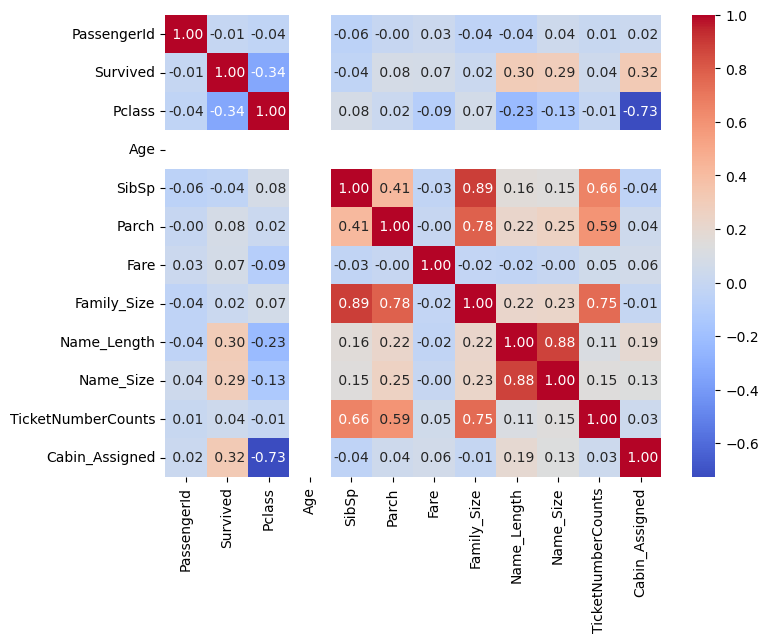

In [241]:
correlation_matrix = train_df.corr(numeric_only = True)

#Create a heatmap using Seaborn
plt.figure(figsize=(8,6))
#Ad just the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=" .2f")

In [243]:
#NEW Drop Sibsp, Parch, TicketNumberCounts

In [245]:
#new
X = train_df.drop(['Survived', 'SibSp', 'Parch'], axis = 1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis = 1)

In [247]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 21)

In [253]:
ordinal_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
])

In [255]:
ordinal_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [271]:
col_trans = ColumnTransformer(transformers = [
    ('impute', SI, ['Age']), 
    ('ord_pipeline', ordinal_pipeline, ode_cols), 
    ('ohe_pipeline', ohe_pipeline, ohe_cols), 
    #('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
    ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])
], 
                             remainder = 'drop', n_jobs = -1)

NameError: name 'ColumnTransformer' is not defined

In [259]:
rfc = RandomForestClassifier()

In [261]:
param_grid = {
    'n_estimators' : [150, 200, 300, 500], 
    'min_samples_split' : [5, 10, 15], 
    'max_depth' : [10, 13, 15, 17, 20], 
    'min_sample-leaf' : [2, 4, 5, 6], 
    'criterion' : ['gini', 'entropy'], 
}

In [273]:
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = StraitfiedKFold(n_splits = 5))

NameError: name 'StraitfiedKFold' is not defined

In [275]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [277]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

NameError: name 'CV_rfc' is not defined

In [279]:
dtc = DecisionTreeClassifier()

In [281]:
param_grid = {
    'min_samples_split' : [5, 10, 15], 
    'max_depth' : [10, 20, 30], 
    'min_sample_leaf' : [1, 2, 4], 
    'criterion' : ['gini', 'entropy'], 
}

In [283]:
CV_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [285]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [287]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [289]:
knn = KNeighborsClassifier()

In [291]:
param_grid = {
    'n_neighbors' : [3, 5, 7, 9, 11], 
    'weights' : ['uniform',  'distance'], 
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'p' : [1, 2],
}

In [293]:
CV_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [295]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [297]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [299]:
svc = SVC(probability=True)

In [301]:
param_grid = {
    'C' : [100, 10, 1.0, 0.1, 0.001, 0.001],
    'kernel' : ['linear', 'poly', 'rdf', 'sigmoid'],
}

In [303]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [305]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [307]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [309]:
lr = LogisticRegression()

In [311]:
param_grid = {
    'C' : [100, 10, 1.0, 0.1, 0.001, 0.001], 
}

In [313]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [315]:
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [317]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [319]:
gnb = GaussianNB()

In [321]:
param_grid = {
    'var_smoothing' : [0.00000001, 0.000000001, 0.00000001], 
}

In [323]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [325]:
pipefinallr = make_pipeline(col_trans, CV_gnb)
pipefinallr.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [327]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [329]:
xg = XGBClassifier()

NameError: name 'XGBClassifier' is not defined

In [331]:
param_grid = {
    'booster' : ['gbtree', 'gblinear', 'dart'], 
}

In [333]:
CV_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

NameError: name 'xg' is not defined

In [335]:
pipefinallr = make_pipeline(col_trans, CV_xg)
pipefinallr.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [337]:
print(CV_xg.best_params_)
print(CV_xg.best_score_)

NameError: name 'CV_xg' is not defined

In [347]:
abc = AdaBoostClassifier()

NameError: name 'AdaBoostClassifier' is not defined

In [349]:
dtc_2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=10)
svc_2 = SVC(probability=True, C = 10, kernel = 'rdf')
lr_2 = LogisticRegression(C = 0.1)
lr_3 = LogisticRegression(C = 0.2)
lr_4 = LogisticRegression(C = 0.05)

In [351]:
param_grid = {
    'estimator' : [dtc_2, svc_2, lr_2], 
    'n_estimators' : [5, 10, 25, 50, 100], 
    'algorithm' : ['SAMME', 'SAMME.R'], 
    'learning_rate' : [(0.97 + x / 100) for x in range (1, 7)]
}

In [353]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

NameError: name 'abc' is not defined

In [355]:
pipefinalabc = make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [357]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

NameError: name 'CV_abc' is not defined

In [359]:
etc = ExtraTreesClassifier()

NameError: name 'ExtraTreesClassifier' is not defined

In [361]:
param_grid = {
    "max_features" : [1, 3, 10],
    "min_samples_split" : [2, 3, 10], 
    "min_sample_leaf" : [1, 3, 10], 
    "n_estimators" : [100, 300], 
}

In [363]:
CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

NameError: name 'etc' is not defined

In [365]:
pipefinaletc = make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [367]:
print(CV_etc.best_params_)
print(CV_etc.best_score_)

NameError: name 'CV_etc' is not defined

In [369]:
GBC = GradientBoostingClassifier()

NameError: name 'GradientBoostingClassifier' is not defined

In [371]:
param_grid = {
    "n_estimators" : [300, 400, 500], 
    "learning_rate" : [0.1, 0.3, 0.6, 1.0],
    "max_depth" : [8, 10, 12], 
    "min_samples_leaf" : [50, 100, 120, 150],
    "max_features" : [0.1, 0.3, 0.5],
}

In [373]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

NameError: name 'GBC' is not defined

In [375]:
pipefinalgbc = make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

NameError: name 'col_trans' is not defined

In [377]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

NameError: name 'CV_gbc' is not defined

In [381]:
vc1 = VotingClassifier([
    ('gbc', CV_gbc.best_estimator_), 
    ('etc', CV_etc.best_estimator_), 
    ('nb', CV_gnb.best_estimator_)], voting = 'hard', weight = [1, 2, 3])

NameError: name 'VotingClassifier' is not defined

In [383]:
vc2 = VotingClassifier([
    ('abc', CV_abc.best_estimator_), 
    ('etc', CV_etc.best_estimator_), 
    ('nb', CV_gnb.best_estimator_)], voting = 'hard', weight = [1, 2, 3])

NameError: name 'VotingClassifier' is not defined

In [385]:
pipefinalcv1 = make_pipeline(col_trans, vc1)

NameError: name 'col_trans' is not defined

In [387]:
pipefinalcv2 = make_pipeline(col_trans, vc2)

NameError: name 'col_trans' is not defined

In [389]:
pipefinalcv1.fit(X_train, y_train)

NameError: name 'pipefinalcv1' is not defined

In [391]:
pipefinalcv2.fit(X_train, y_train)

NameError: name 'pipefinalcv2' is not defined

In [393]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinalllr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)
Y_pred7 = pipefinalxg.predict(X_test)
Y_pred8 = pipefinalabc.predict(X_test)
Y_pred9 = pipefinaletc.predict(X_test)
Y_pred10 = pipefinalgbc.predict(X_test)
Y_pred11 = pipefinalcv1.predict(X_test)
Y_pred12 = pipefinalcv2.predict(X_test)

NameError: name 'pipefinalrfc' is not defined

In [395]:
submission = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred6
})

submission7 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred7
})

submission8 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred8
})

submission9 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred9
})

submission10 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred10
})

submission11 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred11
})

submission12 = pd.DataFrame({
    'PassengerId' : test_df['PassengerId'], 
    'Survived' : Y_pred12
})

NameError: name 'Y_pred' is not defined